<a href="https://colab.research.google.com/github/PsorTheDoctor/robotics/blob/main/matching_the_same_shapes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Matching the same shapes
##Import bibliotek

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
from math import *

##Przydatne funkcje

In [ ]:
def randomize_cuboid(a, b, h, density=1000):
  points = []

  for _ in range(density):
    wall = random.randint(1, 6)
    x = random.random() * a
    y = random.random() * h
    z = random.random() * b

    if wall == 1:
      points.append([x, y, 0])
    elif wall == 2:
      points.append([x, y, b])
    elif wall == 3:
      points.append([x, 0, z])
    elif wall == 4:
      points.append([x, h, z])
    elif wall == 5:
      points.append([0, y, z])
    elif wall == 6:
      points.append([a, y, z])

  return np.array(points)

def plot_scatter(voxels):
  fig = plt.figure()
  ax = Axes3D(fig)

  x_values = voxels[:, 0]
  y_values = voxels[:, 1]
  z_values = voxels[:, 2]
  ax.scatter(x_values, y_values, z_values)
  plt.show()

def plot_both_scatters(A, B):
  fig = plt.figure()
  ax = Axes3D(fig)

  x_A = A[:, 0]
  y_A = A[:, 1]
  z_A = A[:, 2]
  x_B = B[:, 0]
  y_B = B[:, 1]
  z_B = B[:, 2]
  ax.scatter(x_A, y_A, z_A, c='b')
  ax.scatter(x_B, y_B, z_B, c='r')
  plt.show()

##Macierze transformacji

In [ ]:
def rotation_matrix(alpha, beta, gamma):
  R = np.array([[cos(alpha) * cos(beta), 
                 cos(alpha) * sin(beta) * sin(gamma) - sin(alpha) * cos(gamma),
                 cos(alpha) * sin(beta) * cos(gamma) + sin(alpha) * sin(gamma)],
                [sin(alpha) * cos(beta),
                 sin(alpha) * sin(beta) * sin(gamma) + cos(alpha) * cos(gamma),
                 sin(alpha) * sin(beta) * cos(gamma) - cos(alpha) * sin(gamma)],
                [-sin(beta),
                 cos(beta) * sin(gamma),
                 cos(beta) * cos(gamma)]])
  return R

def translation_matrix(x, y, z):
  t = np.array([x, y, z])
  return t

# def transformation_matrix(x, y, z, alpha, beta, gamma):
#   R = rotation_matrix(alpha, beta, gamma)
#   t = translation_matrix(x, y, z)
#   T = np.column_stack((R, t))
#   T = np.vstack((T, [0, 0, 0, 1]))
#   return T

def randomize_rotation():
  alpha = radians(random.random() * 180)
  beta = radians(random.random() * 180)
  gamma = radians(random.random() * 180)
  return rotation_matrix(alpha, beta, gamma)

def randomize_translation():
  x = random.random()
  y = random.random()
  z = random.random()
  return translation_matrix(x, y, z)

# def randomize_transformation():
#   R = randomize_rotation(alpha, beta, gamma)
#   t = randomize_translation(x, y, z)
#   T = np.column_stack((R, t))
#   T = np.vstack((T, [0, 0, 0, 1]))
#   return T

##Stworzenie szablonu i obiektu

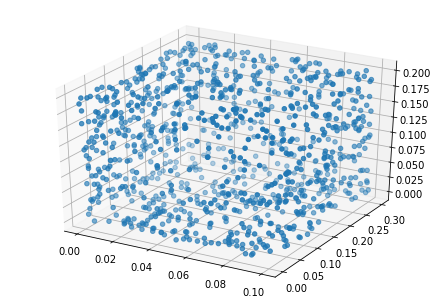

In [ ]:
# Stworzenie szablonu w postaci pustego prostopadłościanu
A = randomize_cuboid(0.1, 0.2, 0.3)
plot_scatter(A)

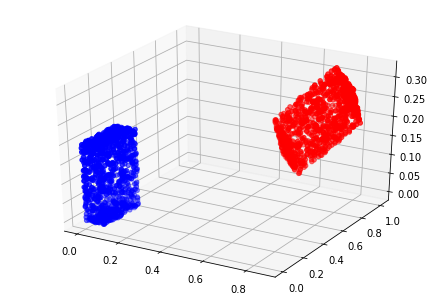

In [ ]:
# Stworzenie obiektu przez dodanie losowej transformacji
R_random = randomize_rotation()
t_random = randomize_translation()
B = np.dot(A, R_random) + t_random
plot_both_scatters(A, B)

##Normalizacja

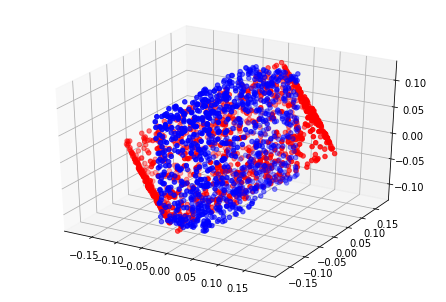

In [ ]:
# Znalezienie centroidów
a_mean = np.mean(A, axis=0)
b_mean = np.mean(B, axis=0)

A_norm = A - a_mean
B_norm = B - b_mean
plot_both_scatters(A_norm, B_norm)

In [ ]:
print(a_mean)
print(b_mean)
# Istnieje zależność między położeniem cetroidów a translacją
print(b_mean - a_mean)
print(t_random)

[0.0487179  0.14935488 0.10012588]
[0.68772864 0.84157184 0.19802256]
[0.63901074 0.69221696 0.09789669]
[0.66967211 0.70031918 0.07790948]


In [ ]:
N = np.zeros((3, 3))

for i in range(1000):
  N += np.dot(A_norm[i].reshape(3, 1), B_norm[i].reshape(1, 3))

N = np.dot(A_norm.T, B_norm)
print(N)

[[-0.43203223 -0.64200808  1.15839891]
 [ 7.90896805  7.32631586  4.99089734]
 [-3.97196036  4.06740591  0.73498045]]


##Rozkład na wartości osobliwe

In [ ]:
U, D, V = np.linalg.svd(N)
print(U.shape)
print(D.shape)
print(V.shape)

(3, 3)
(3,)
(3, 3)


In [ ]:
S = np.identity(3)
det = np.linalg.det(U) * np.linalg.det(V.T)
print(det)

1.0000000000000016


In [ ]:
if not np.isclose(det, 1):
  S[2, 2] = -1

##Macierze transformacji

In [ ]:
# Macierz obrotu
R = np.dot(np.dot(U, S), V)
print(R)

[[-0.22888634 -0.38581901  0.89373079]
 [ 0.66937771  0.60421765  0.43226671]
 [-0.70678464  0.69718342  0.11996148]]


In [ ]:
# t = np.dot(R, b_mean.reshape(3, 1)) - a_mean.reshape(3, 1)
# t = -t.squeeze()

# Wektor przesunięcia
t = b_mean - a_mean
print(t)

[0.63901074 0.69221696 0.09789669]


##Wynik transformacji

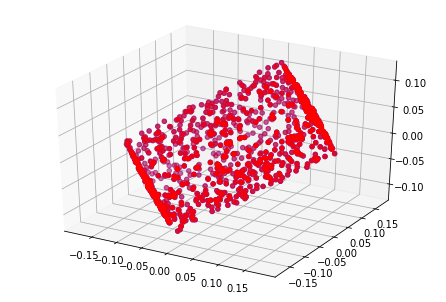

In [ ]:
result = np.dot(A_norm, R)
plot_both_scatters(B_norm, result)

In [ ]:
# def euclidean_distance(A, B):
#   d = 0
#   for i in range(A.shape[0]):
#     d += sqrt((pow((A[i][0] - B[i][0]), 2) + pow((A[i][1] - B[i][1]), 2) + pow((A[i][2] - B[i][2]), 2)))
#   return d

# print(euclidean_distance(A_norm, B_norm))

##Iterative Closest Point

In [ ]:
def icp(A, B):
  a_mean = np.mean(A, axis=0)
  b_mean = np.mean(B, axis=0)
  A_norm = A - a_mean
  B_norm = B - b_mean

  N = np.zeros((3, 3))

  for i in range(1000):
    N += np.dot(A_norm[i].reshape(3, 1), B_norm[i].reshape(1, 3))
    N = np.dot(A_norm.T, B_norm)

  U, D, V = np.linalg.svd(N)
  S = np.identity(3)
  det = np.linalg.det(U) * np.linalg.det(V.T)

  if not np.isclose(det, 1):
    S[2, 2] = -1

  R = np.dot(np.dot(U, S), V)
  t = b_mean - a_mean
    
  return R, t

In [ ]:
R, t = icp(A, B)

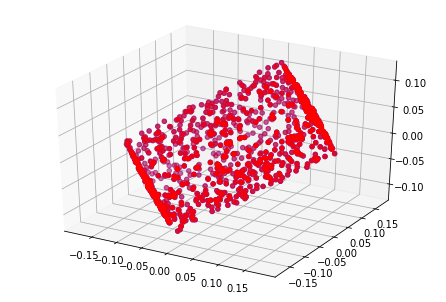

In [ ]:
result = np.dot(A_norm, R)
plot_both_scatters(B_norm, result)

##Sprawdzenie wyników

In [ ]:
print(R_random)
print(R)

[[-0.22888634 -0.38581901  0.89373079]
 [ 0.66937771  0.60421765  0.43226671]
 [-0.70678464  0.69718342  0.11996148]]
[[-0.22888634 -0.38581901  0.89373079]
 [ 0.66937771  0.60421765  0.43226671]
 [-0.70678464  0.69718342  0.11996148]]


In [ ]:
print(t_random)
print(t)

[0.66967211 0.70031918 0.07790948]
[0.63901074 0.69221696 0.09789669]


##Credits
Paul Besl and Neil McKay. *A Method for Registration of 3-D Shapes*

John Lambert [https://johnwlambert.github.io/icp/](https://johnwlambert.github.io/icp/)